In [1]:
!pip install keras-rl2

In [2]:
import numpy as np
import gym

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/jaxlib/xla_client.py:225: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  float8_e4m3b11fnuz = ml_dtypes.float8_e4m3b11


In [3]:
# defining the neural net with variable layer size that will be the agent
def build_model( state_dim, actions, layer_size ):
    model = Sequential()
    model.add( Flatten(input_shape=(1,state_dim)) )
    model.add( Dense(layer_size, activation='relu') )
    model.add( Dense(layer_size, activation='relu') )
    model.add( Dense(actions,activation='linear') )
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile( loss='MAPE', optimizer=opt )
    return model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Network with layer size 10

In [14]:
env = gym.make("CartPole-v1")
STATE_DIM = env.observation_space.shape[0] # dimension of the state space
NB_ACTIONS = 2 # number of actions
layer_size = 10 # size of fully connected layer
env.close()

model = build_model( STATE_DIM, NB_ACTIONS, layer_size )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 4)                 0         
                                                                 
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Training for 5000 steps ...
Interval 1 (0 steps performed)
   1/1000 [..............................] - ETA: 1:01 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


  31/1000 [..............................] - ETA: 27s - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch

1000/1000 [==============================] - 12s 12ms/step - reward: 1.0000
89 episodes - episode_reward: 11.135 [8.000, 37.000] - loss: 0.293 - mae: 1.843 - mean_q: 3.593

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 18s 18ms/step - reward: 1.0000
25 episodes - episode_reward: 36.800 [8.000, 93.000] - loss: 0.665 - mae: 4.697 - mean_q: 9.025

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 9s 9ms/step - reward: 1.0000
10 episodes - episode_reward: 102.600 [50.000, 186.000] - loss: 0.805 - mae: 7.448 - mean_q: 14.680

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 7s 7ms/step - reward: 1.0000
5 episodes - episode_reward: 164.000 [91.000, 312.000] - loss: 1.091 - mae: 10.247 - mean_q: 20.432

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 8s 8ms/step - reward: 1.0000
done, took 55.225 seconds


Text(0, 0.5, 'nb_steps')

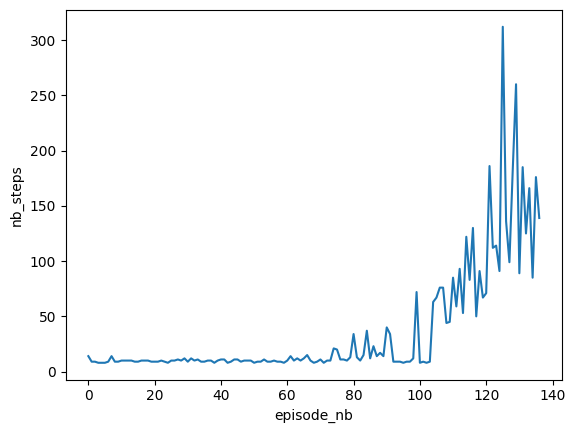

In [5]:
# Configure and compile our agent.
# Policy = Epsilon Greedy
# Memory = Sequential Memory

policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=NB_ACTIONS, memory=memory, nb_steps_warmup=10,target_model_update=1e-2, policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

# Training
results_ls10 = dqn.fit(env, nb_steps=20000, visualize=False, verbose=1, log_interval=1000)

### Network with layer size 30

In [6]:
layer_size = 30 # size of fully connected layer
model = build_model( STATE_DIM, NB_ACTIONS, layer_size )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 30)                150       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,142
Trainable params: 1,142
Non-trainable params: 0
_________________________________________________________________


Training for 5000 steps ...
Interval 1 (0 steps performed)
1000/1000 [==============================] - 10s 10ms/step - reward: 1.0000
86 episodes - episode_reward: 10.942 [8.000, 50.000] - loss: 0.209 - mae: 1.959 - mean_q: 3.810

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 8s 8ms/step - reward: 1.0000
13 episodes - episode_reward: 79.923 [28.000, 202.000] - loss: 0.488 - mae: 5.238 - mean_q: 10.277

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 9s 9ms/step - reward: 1.0000
8 episodes - episode_reward: 101.125 [71.000, 162.000] - loss: 0.655 - mae: 8.677 - mean_q: 17.386

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 9s 9ms/step - reward: 1.0000
7 episodes - episode_reward: 166.714 [118.000, 304.000] - loss: 0.663 - mae: 12.050 - mean_q: 24.323

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 8s 8ms/step - reward: 1.0000
done, took 42.574 seconds


Text(0, 0.5, 'nb_steps')

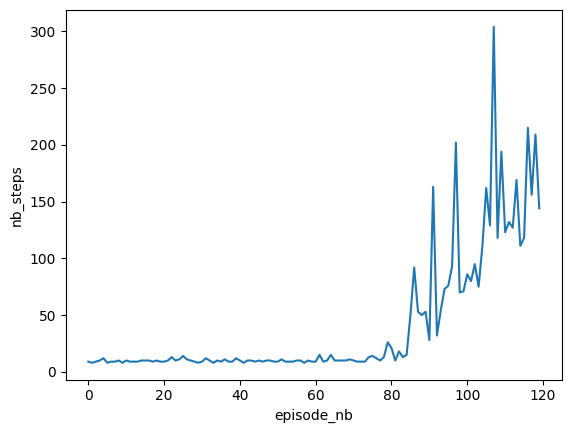

In [7]:
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=NB_ACTIONS, memory=memory, nb_steps_warmup=10,target_model_update=1e-2, policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

# Training
results_ls30 = dqn.fit(env, nb_steps=20000, visualize=False, verbose=1, log_interval=1000)

plt.plot( results_ls30.history['episode_reward'] )
plt.xlabel( "episode_nb" )
plt.ylabel( "nb_steps" )

### Network with layer size **100**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 100)               500       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,802
Trainable params: 10,802
Non-trainable params: 0
_________________________________________________________________


In [9]:
#-- create network
layer_size = 100 # size of fully connected layer
model = build_model( STATE_DIM, NB_ACTIONS, layer_size )

#-- create agent
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=NB_ACTIONS, memory=memory, nb_steps_warmup=10,target_model_update=1e-2, policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

# Training
results_ls100 = dqn.fit(env, nb_steps=20000, visualize=False, verbose=1, log_interval=1000)

Training for 5000 steps ...
Interval 1 (0 steps performed)
1000/1000 [==============================] - 11s 10ms/step - reward: 1.0000
60 episodes - episode_reward: 16.450 [8.000, 118.000] - loss: 0.114 - mae: 2.327 - mean_q: 4.598

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 11s 11ms/step - reward: 1.0000
8 episodes - episode_reward: 97.000 [14.000, 230.000] - loss: 0.421 - mae: 6.533 - mean_q: 12.951

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 9s 9ms/step - reward: 1.0000
4 episodes - episode_reward: 252.000 [142.000, 319.000] - loss: 0.528 - mae: 10.895 - mean_q: 21.884

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 8s 8ms/step - reward: 1.0000
3 episodes - episode_reward: 309.333 [286.000, 330.000] - loss: 0.950 - mae: 15.266 - mean_q: 30.723

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 9s 9ms/step - reward: 1.0000
done, took 48.171 seconds


NameError: ignored

### Layer size comparision

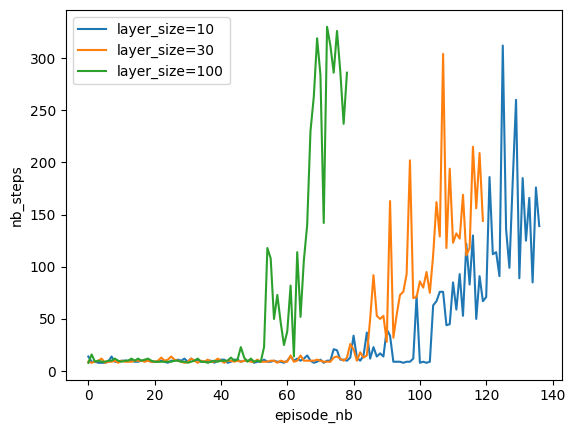

In [13]:
plt.plot( results_ls10.history['episode_reward'], label='layer_size=10' )
plt.plot( results_ls30.history['episode_reward'], label='layer_size=30')
plt.plot( results_ls100.history['episode_reward'], label='layer_size=100' )
plt.xlabel( "episode_nb" )
plt.ylabel( "nb_steps" )
plt.legend()